In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.transforms
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.style.use('seaborn-darkgrid')
print(plt.style.available)


IN_data = pd.read_csv("/Users/mr.ravirajkumar/Documents/Covid_India/covid_19_india.csv")


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [236]:
IN_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [237]:
IN_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4356 entries, 0 to 4355
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       4356 non-null   int64 
 1   Date                      4356 non-null   object
 2   Time                      4356 non-null   object
 3   State/UnionTerritory      4356 non-null   object
 4   ConfirmedIndianNational   4356 non-null   object
 5   ConfirmedForeignNational  4356 non-null   object
 6   Cured                     4356 non-null   int64 
 7   Deaths                    4356 non-null   int64 
 8   Confirmed                 4356 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 306.4+ KB


In [238]:
from datetime import datetime

In [246]:
IN_data["Date"] = pd.to_datetime(IN_data["Date"])

In [247]:
IN_data['Date']

0      2020-01-30
1      2020-01-31
2      2020-01-02
3      2020-02-02
4      2020-03-02
5      2020-04-02
6      2020-05-02
7      2020-06-02
8      2020-07-02
9      2020-08-02
10     2020-09-02
11     2020-10-02
12     2020-11-02
13     2020-12-02
14     2020-02-13
15     2020-02-14
16     2020-02-15
17     2020-02-16
18     2020-02-17
19     2020-02-18
20     2020-02-19
21     2020-02-20
22     2020-02-21
23     2020-02-22
24     2020-02-23
25     2020-02-24
26     2020-02-25
27     2020-02-26
28     2020-02-27
29     2020-02-28
30     2020-02-29
31     2020-01-03
32     2020-02-03
33     2020-02-03
34     2020-02-03
35     2020-03-03
36     2020-03-03
37     2020-03-03
38     2020-03-03
39     2020-04-03
40     2020-04-03
41     2020-04-03
42     2020-04-03
43     2020-04-03
44     2020-04-03
45     2020-05-03
46     2020-05-03
47     2020-05-03
48     2020-05-03
49     2020-05-03
50     2020-05-03
51     2020-06-03
52     2020-06-03
53     2020-06-03
54     2020-06-03
55     202

In [243]:
IN_data["Date"].head()

0    2020-01-30
1    2020-01-31
2    2020-01-02
3    2020-02-02
4    2020-03-02
Name: Date, dtype: object

In [182]:
IN_data.describe()

,Sno,Cured,Deaths,Confirmed
count,4356.000000,4356.000000,4356.000000,4356.000000
mean,2178.500000,4094.138200,204.955923,7240.704316
std,1257.613216,14127.667237,881.667270,24117.455971
min,1.000000,0.000000,0.000000,0.000000
25%,1089.750000,5.000000,0.000000,33.000000
50%,2178.500000,103.500000,3.000000,434.500000
75%,3267.250000,1845.500000,45.250000,3723.750000
max,4356.000000,175029.000000,12030.000000,318695.000000


Text(0.5, 1.0, 'Top 5 States with most deaths')

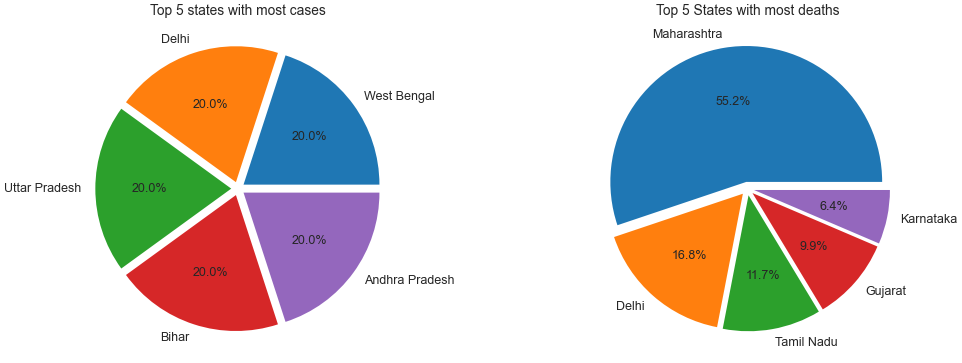

In [183]:
explode = [0.05, 0.05, 0.05, 0.05, 0.05]

plt.figure(figsize=(10,10), dpi=45)
plt.subplots_adjust(right=2.2)

most_cases_df = IN_data.groupby(["State/UnionTerritory"]).agg({"ConfirmedIndianNational":"max"}).sort_values(by='ConfirmedIndianNational', ascending=False)[0:5]

plt.tight_layout(pad=100.0)
plt.subplot(1,2,1)
plt.pie(most_cases_df['ConfirmedIndianNational'], labels=most_cases_df.index.values,
        explode=explode, autopct="%2.1f%%", textprops={"fontsize":20})
plt.title("Top 5 states with most cases", fontsize="22")

most_deaths_df = IN_data.groupby(["State/UnionTerritory"]).agg({"Deaths":"max"}).sort_values(by='Deaths', ascending=False)[0:5]

plt.subplot(1,2,2)
plt.pie(most_deaths_df['Deaths'], labels=most_deaths_df.index.values,
        explode=explode, autopct="%2.1f%%", textprops={"fontsize":20})
plt.title("Top 5 States with most deaths", fontsize="22")

In [184]:
x = IN_data['Date'].sort_values()

In [185]:
x.head()

2      2020-01-02
31     2020-01-03
538    2020-01-04
557    2020-01-04
556    2020-01-04
Name: Date, dtype: object

In [186]:
case_count = IN_data.groupby("State/UnionTerritory").agg({"Confirmed":"max"}).sort_values(by='Confirmed', ascending=False)[0:5]

In [187]:
case_count.head()

,Confirmed
State/UnionTerritory,
Maharashtra,318695
Tamil Nadu,175678
Delhi,123747
Karnataka,67420
Andhra Pradesh,53724


In [259]:
death_count = IN_data.groupby("State/UnionTerritory").agg({"Deaths":"max"}).sort_values(by='Deaths', ascending=False)[0:5]

In [260]:
death_count.head()

,Deaths
State/UnionTerritory,
Maharashtra,12030
Delhi,3663
Tamil Nadu,2551
Gujarat,2162
Karnataka,1403


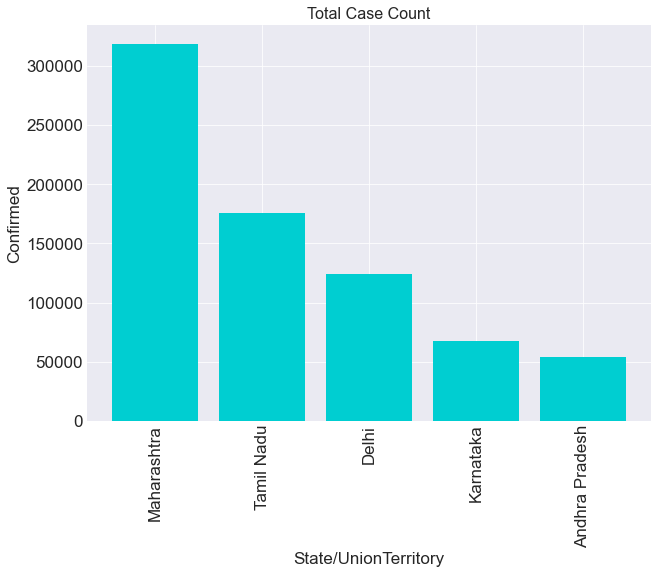

In [188]:
plt.subplots_adjust(right=3.0, top=1.5)

plt.subplot(1,2,1)
plt.bar(case_count.index.values, case_count['Confirmed'], color="#00CED1")
plt.title("Total Case Count", fontsize=16)
plt.ylabel("Confirmed", fontsize=17)
plt.xlabel("State/UnionTerritory", fontsize=17)
plt.xticks(rotation=90)
plt.tick_params(labelsize=17)

In [189]:
death = IN_data.groupby("State/UnionTerritory").agg({"Deaths":"max"}).sort_values(by='Deaths', ascending=False)[0:5]

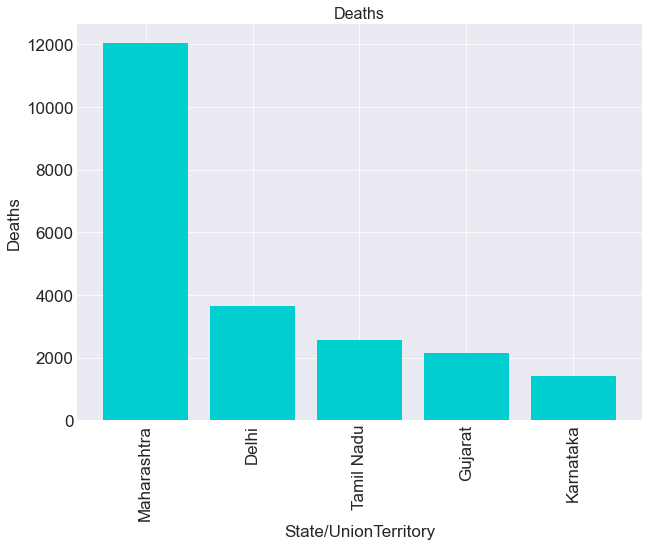

In [190]:
plt.subplots_adjust(right=3.0, top=1.5)

plt.subplot(1,2,1)
plt.bar(death.index.values, death['Deaths'], color="#00CED1")
plt.title("Deaths", fontsize=16)
plt.ylabel("Deaths", fontsize=17)
plt.xlabel("State/UnionTerritory", fontsize=17)
plt.xticks(rotation=90)
plt.tick_params(labelsize=17)

In [192]:
import matplotlib.pyplot as plt
import plotly.express as px

In [253]:
fig = px.line(IN_data, x='State/UnionTerritory', y='Confirmed')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

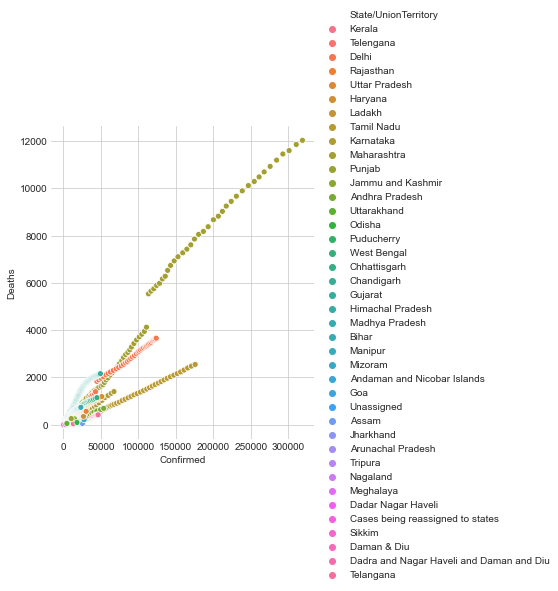

In [269]:
sns.relplot(x="Confirmed", y="Deaths", hue="State/UnionTerritory", data=IN_data)

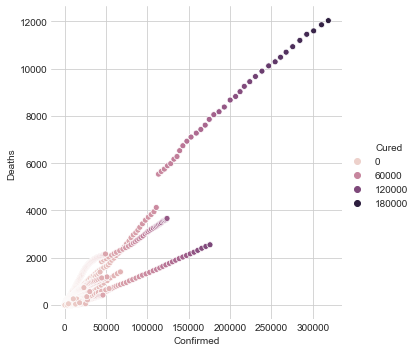

In [271]:
sns.relplot(x="Confirmed", y="Deaths", hue="Cured", data=IN_data)

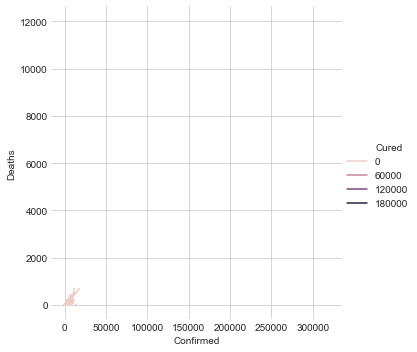

In [275]:
sns.relplot(x="Confirmed", y="Deaths", kind="line", data=IN_data, hue="Cured")